In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('../data/forest_fires.csv')

## Исследование исходных данных 
### Вывод базовой информации

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


**Состав и описание полей файла forestfires.csv**

`X` - пространственная координата по оси x на карте парка Монтесиньо: от 1 до 9

`Y` - пространственная координата по оси Y на карте парка Монтесиньо: от 2 до 9

`month` (месяц) - месяц года: от "янв" до "декабрь"

`day` (день) - день недели: от "пн" до "вс"

`FFMC` - индекс FFMC из системы FWI: от 18,7 до 96,20 (измеряет скорость возгорания мелких горючих материалов, например, иголки, листья)

`DMC` - индекс DMC из системы FWI: от 1,1 до 291,3 (измеряет влажность органического слоя почв, например, опавшая хвоя, кора)

`DC` - индекс DC из системы FWI: от 7,9 до 860,6 (измеряет влажность глубоких слоёв почвы, например, минеральный слой, корни)

`ISI` - индекс ISI из системы FWI: от 0,0 до 56,10 (измеряет скорость начального распространения огня по поверхности)

`temp` - температура в градусах Цельсия: от 2,2 до 33,30

`RH` - относительная влажность в %: от 15,0 до 100

`wind` (ветер) - скорость ветра в км/ч: от 0,40 до 9,40

`rain` (дождь) - дождь снаружи в мм/м2: от 0,0 до 6,4

`area` - сгоревшая площадь леса (в га): от 0,00 до 1090,84

In [4]:
data.head(20)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


Для дальнейшей работы признаки `month`, `day` должны быть закодированы. Отсутсвуют столбцы, подлежащие удалению. 

In [5]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### Обработка пропущенных значений

In [6]:
(data.isna().sum() / data.shape[0] * 100).sort_values(ascending=False)

X        0.0
Y        0.0
month    0.0
day      0.0
FFMC     0.0
DMC      0.0
DC       0.0
ISI      0.0
temp     0.0
RH       0.0
wind     0.0
rain     0.0
area     0.0
dtype: float64

Пропущенные значения отсутсвуют.

### Коррекция типов

In [7]:
data['month'].value_counts()

month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64

In [8]:
dict_month = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

data['month'] = data['month'].map(dict_month)

In [9]:
data['month'].value_counts()

month
8     184
9     172
3      54
7      32
2      20
6      17
10     15
4       9
12      9
1       2
5       2
11      1
Name: count, dtype: int64

In [10]:
data['day'].value_counts()

day
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: count, dtype: int64

In [11]:
dict_day = {
    'mon': 0,
    'tue': 1,
    'wed': 2,
    'thu': 3,
    'fri': 4,
    'sat': 5,
    'sun': 6
}

data['day'] = data['day'].map(dict_day)

data['month'].value_counts()

month
8     184
9     172
3      54
7      32
2      20
6      17
10     15
4       9
12      9
1       2
5       2
11      1
Name: count, dtype: int64

In [12]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,4,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,5,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### Проверка "очищенных" данных

In [13]:
duplicates = data.duplicated().sum()
print(f'Обнаружено {duplicates} дубликатов')
print(f'Составляют {round(duplicates / len(data), 2)}%')

data = data.drop_duplicates()

Обнаружено 4 дубликатов
Составляют 0.01%


Дубликаты обнаружены и удалены.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       513 non-null    int64  
 1   Y       513 non-null    int64  
 2   month   513 non-null    int64  
 3   day     513 non-null    int64  
 4   FFMC    513 non-null    float64
 5   DMC     513 non-null    float64
 6   DC      513 non-null    float64
 7   ISI     513 non-null    float64
 8   temp    513 non-null    float64
 9   RH      513 non-null    int64  
 10  wind    513 non-null    float64
 11  rain    513 non-null    float64
 12  area    513 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 56.1 KB


Признаки `x`, `y`, `month`, `day`, `RH` есть смысл перевести из int64 в int8 для экономии памяти.

In [15]:
attributes = ['X', 'Y', 'month', 'day', 'RH']
for at in attributes:
    data[at] = data[at].astype('int8')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       513 non-null    int8   
 1   Y       513 non-null    int8   
 2   month   513 non-null    int8   
 3   day     513 non-null    int8   
 4   FFMC    513 non-null    float64
 5   DMC     513 non-null    float64
 6   DC      513 non-null    float64
 7   ISI     513 non-null    float64
 8   temp    513 non-null    float64
 9   RH      513 non-null    int8   
 10  wind    513 non-null    float64
 11  rain    513 non-null    float64
 12  area    513 non-null    float64
dtypes: float64(8), int8(5)
memory usage: 38.6 KB


In [17]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,4,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,5,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Типы и значения данных обработаны, можно переходить к следующим этапам обаботки.

## EDA
### Числовые признаки

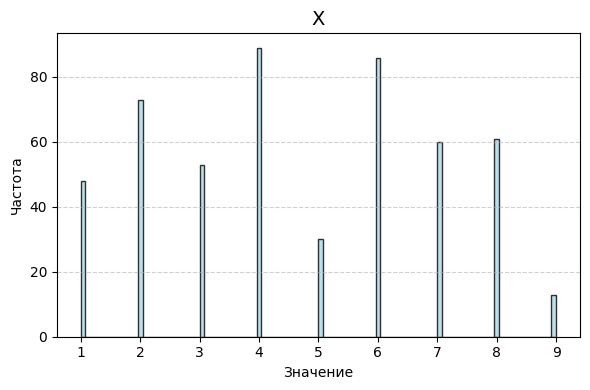

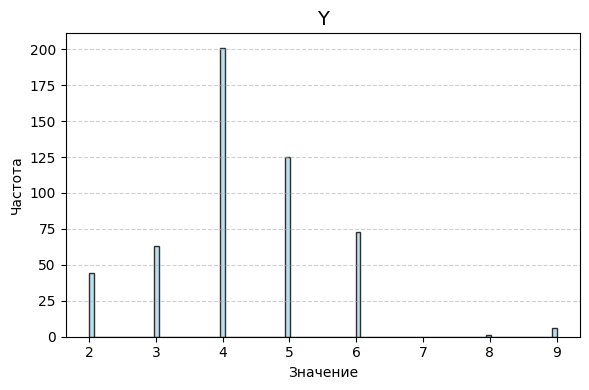

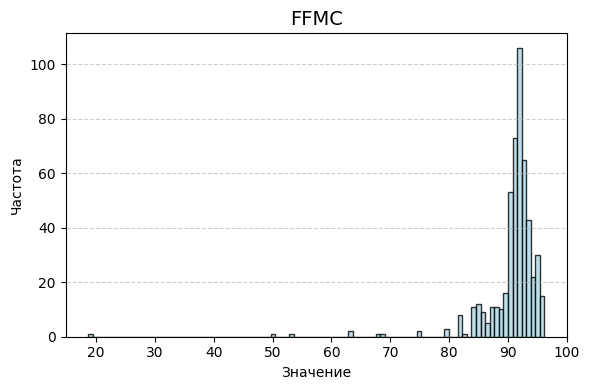

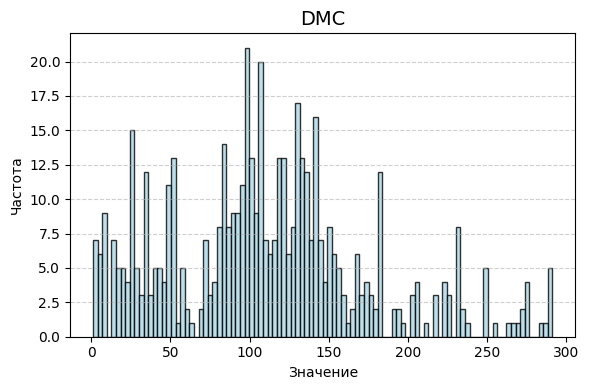

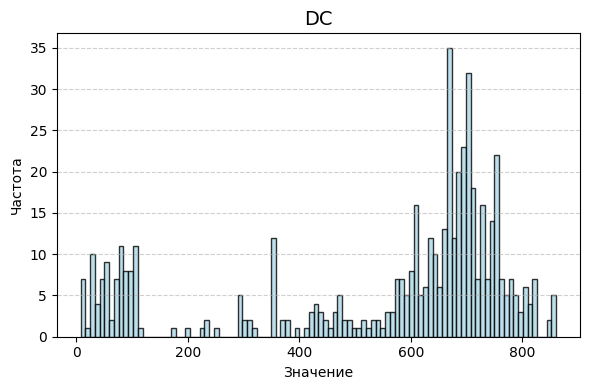

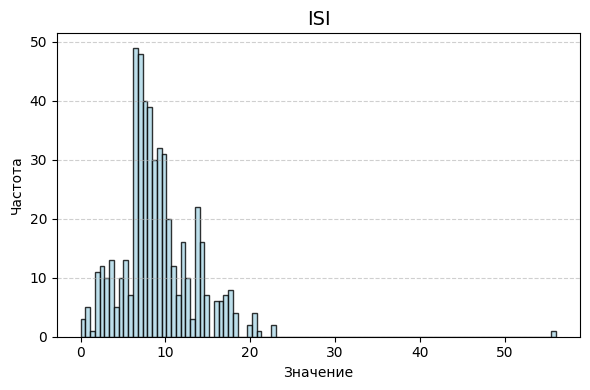

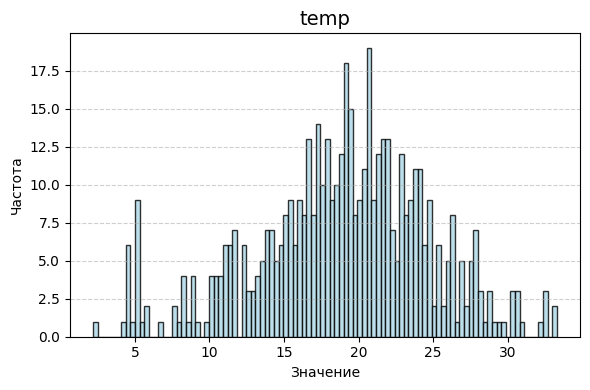

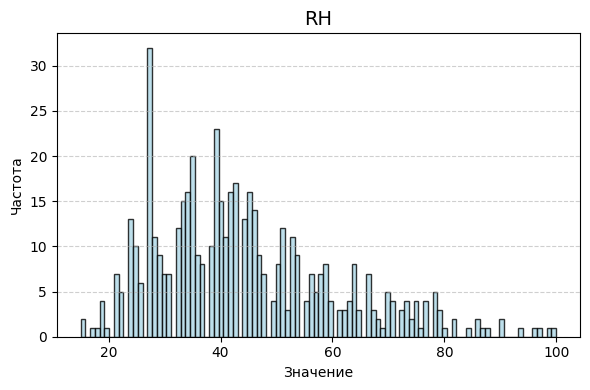

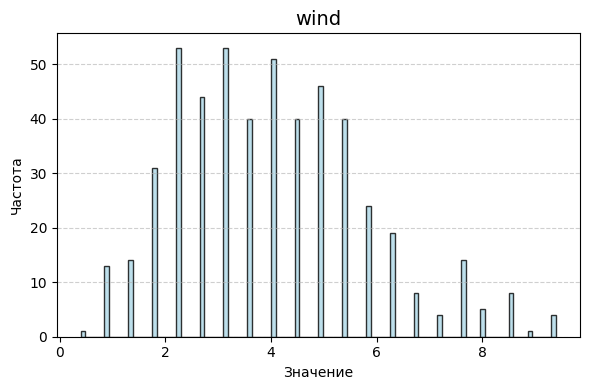

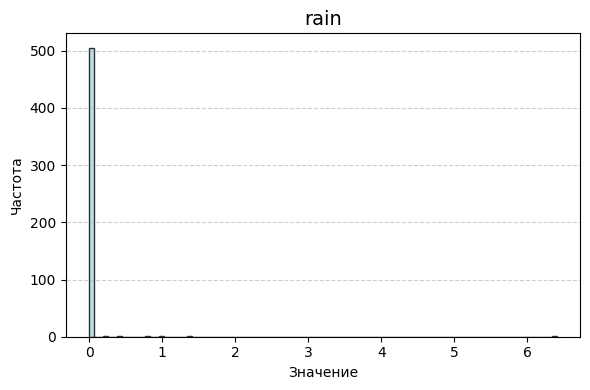

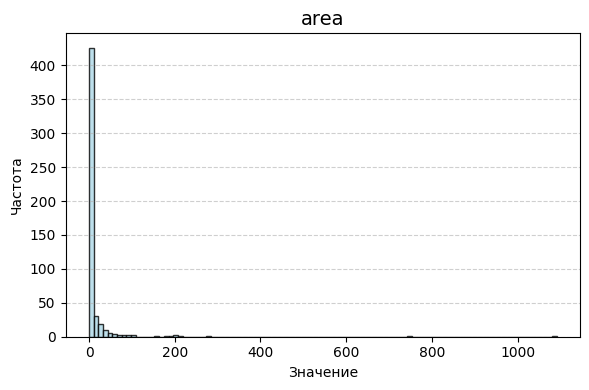

In [18]:
for col in data.columns:
    if col not in ['month', 'day']:

        plt.figure(figsize=(6, 4))

        plt.hist(
            data[col],
            bins=100,
            color='lightblue',
            edgecolor='black',
            alpha=0.8 
        )

        plt.title(f'{col}', fontsize=14)
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(axis='y', linestyle='--', alpha=0.6)

        plt.tight_layout()
        plt.show()


### Обработка выбросов в числовых признаках

Признаки `X`, `Y` выбросов не имеют, так как их значения соответствуют шкале от 1 до 9.

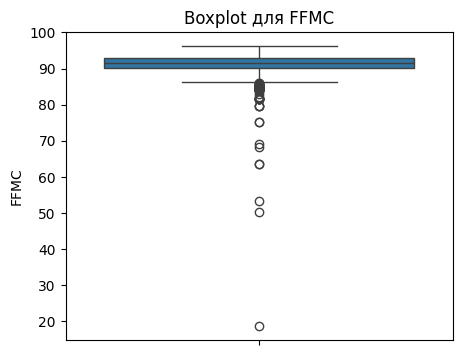

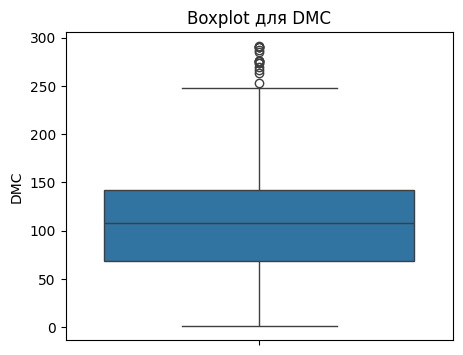

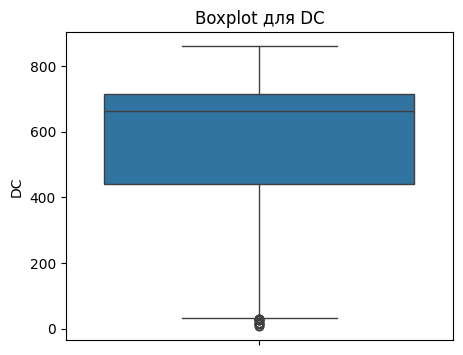

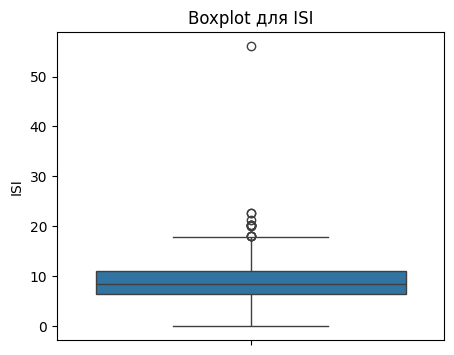

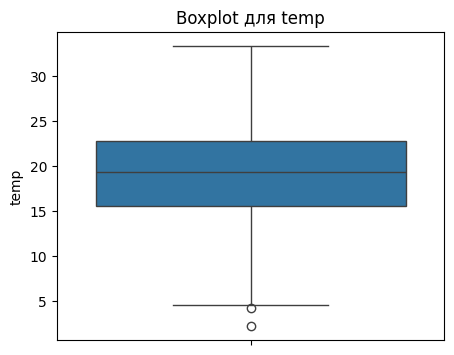

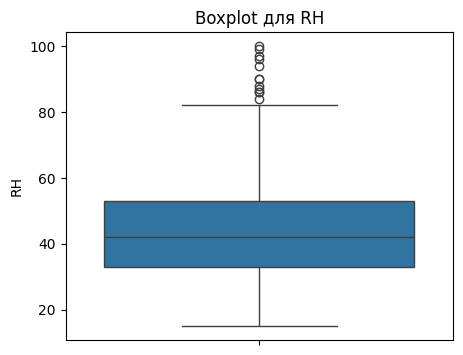

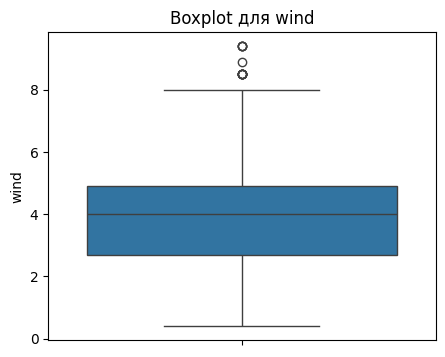

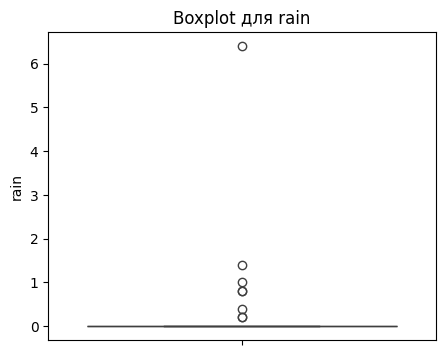

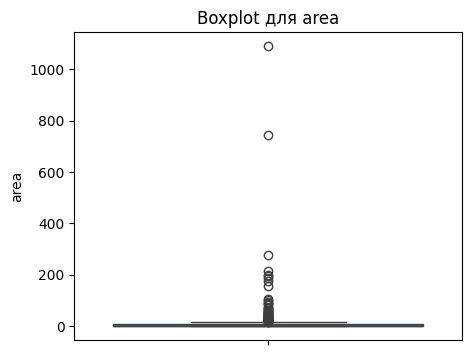

In [19]:
for col in data.columns:
    if col not in ['X', 'Y', 'month', 'day']:
        plt.figure(figsize=(5, 4))
        sns.boxplot(data[col])
        plt.title(f'Boxplot для {col}')
        plt.show()

Распределение признаков `FFMC`, `DC`, `rain`, `area` не имеет схожести с нормальным, поэтому оставим центральные 98% их значений (от 2-го до 98-го перцентиля).

Распрежедение признаков `DMC`, `ISI`, `temp`, `RH`, `wind` cхожи с нормальным, используем обрезку по квантилям. 

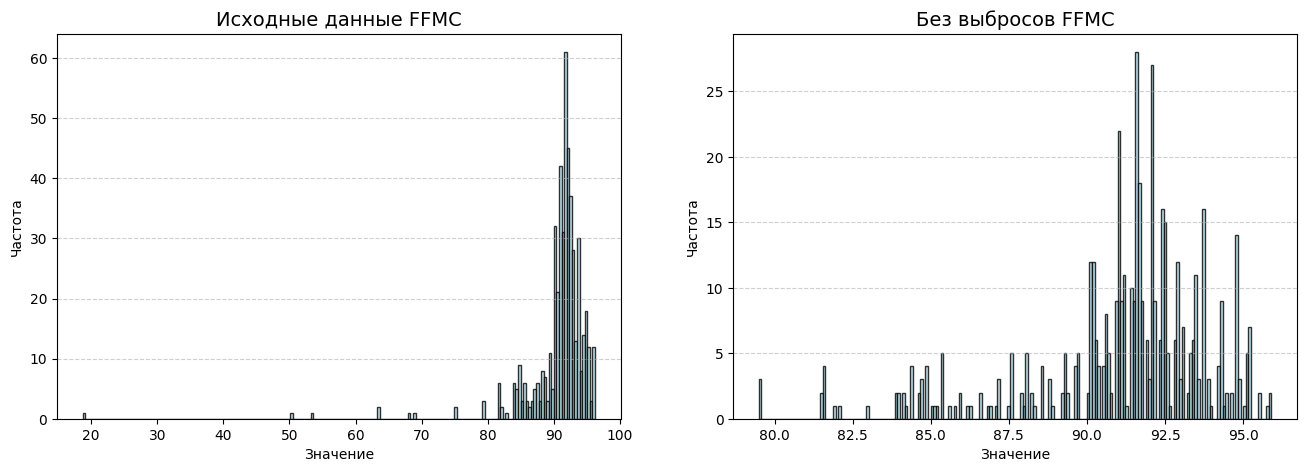

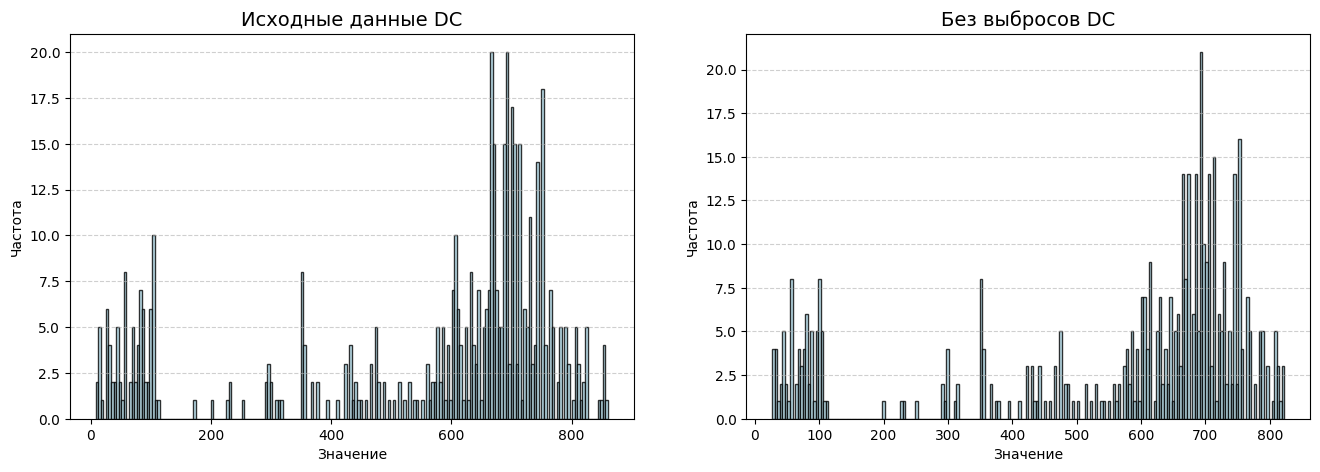

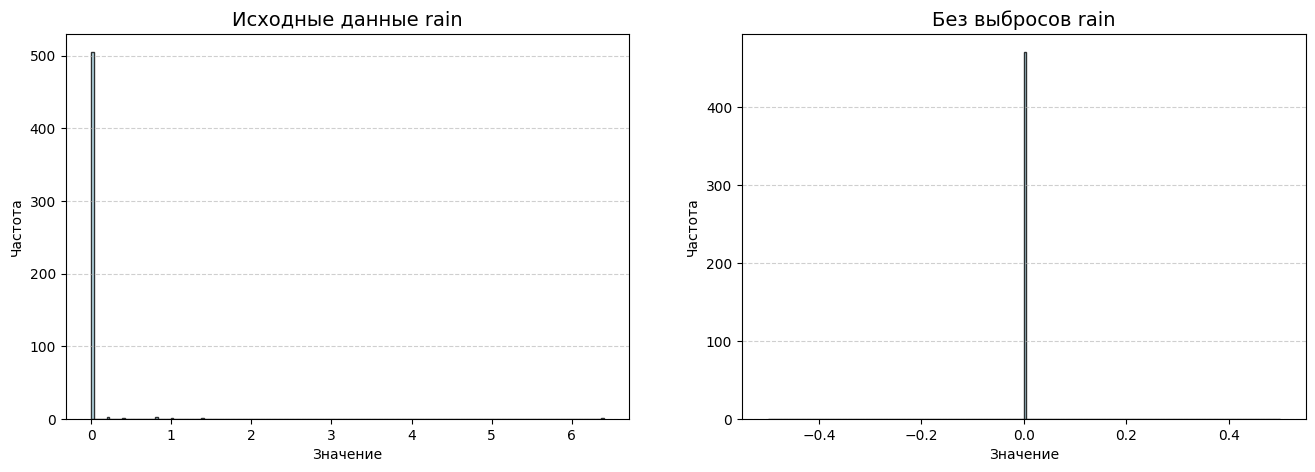

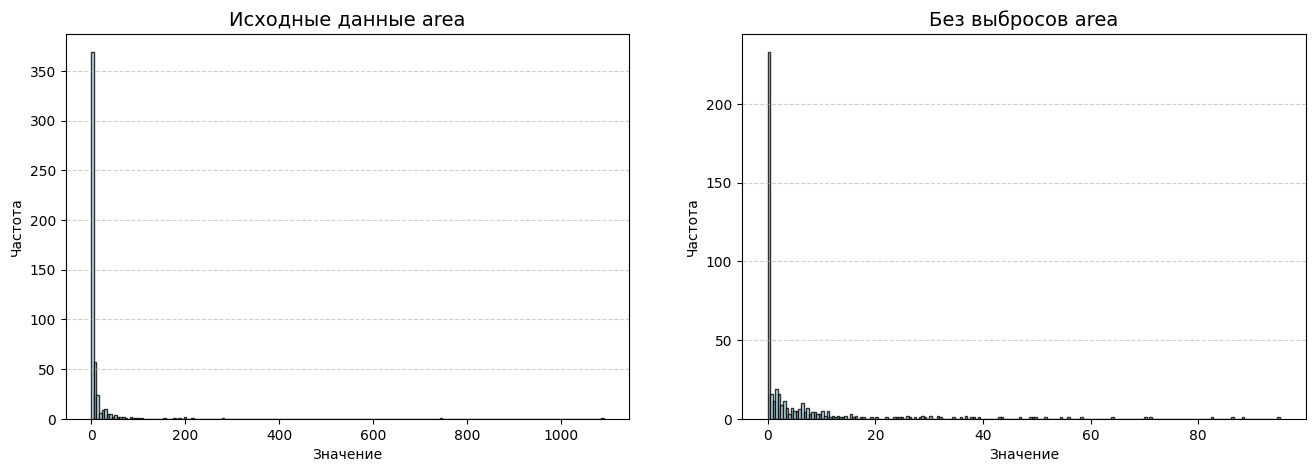

In [20]:
data_filtered = data.copy()

col_for_per = ['FFMC', 'DC', 'rain', 'area']

for col in col_for_per:

    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    axes[0].hist(
        data[col],
        bins=200,
        color='lightblue',
        edgecolor='black',
        alpha=0.8
    )
    axes[0].set_title(f'Исходные данные {col}', fontsize=14)
    axes[0].set_xlabel('Значение')
    axes[0].set_ylabel('Частота')
    axes[0].grid(axis='y', linestyle='--', alpha=0.6)

    lower_bound = data[col].quantile(0.02)
    upper_bound = data[col].quantile(0.98)

    data_filtered = data_filtered[(data_filtered[col] >= lower_bound) & (data_filtered[col] <= upper_bound)]

    axes[1].hist(
        data_filtered[col],
        bins=200,
        color='lightblue',
        edgecolor='black',
        alpha=0.8
    )
    axes[1].set_title(f'Без выбросов {col}', fontsize=14)
    axes[1].set_xlabel('Значение')
    axes[1].set_ylabel('Частота')
    axes[1].grid(axis='y', linestyle='--', alpha=0.6)

    plt.show()

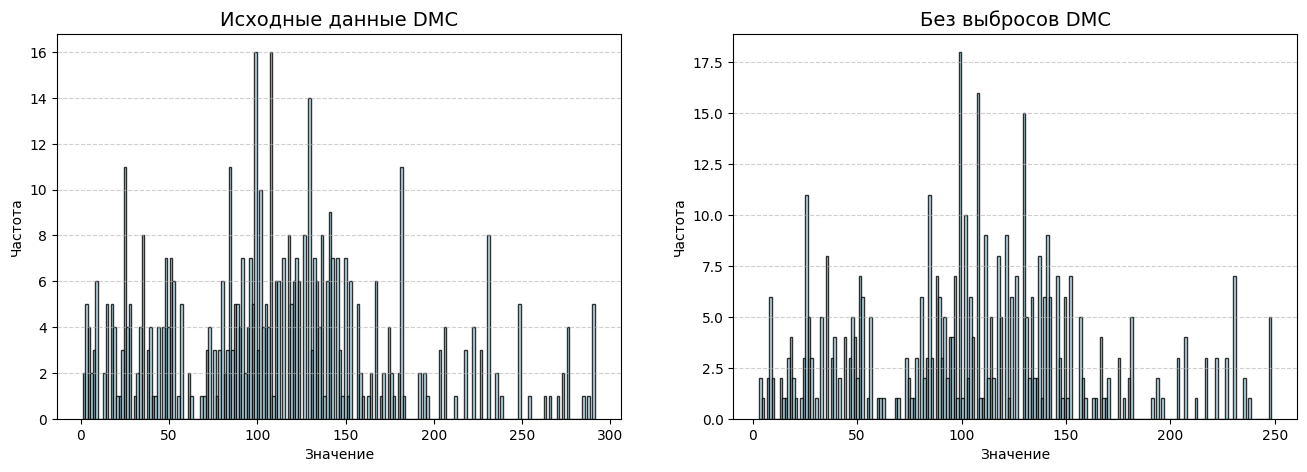

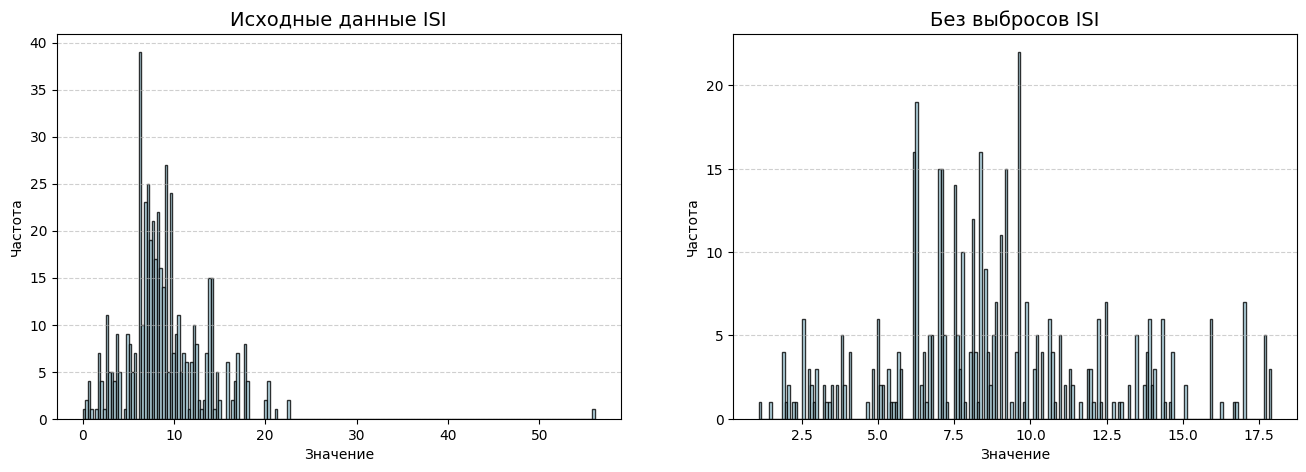

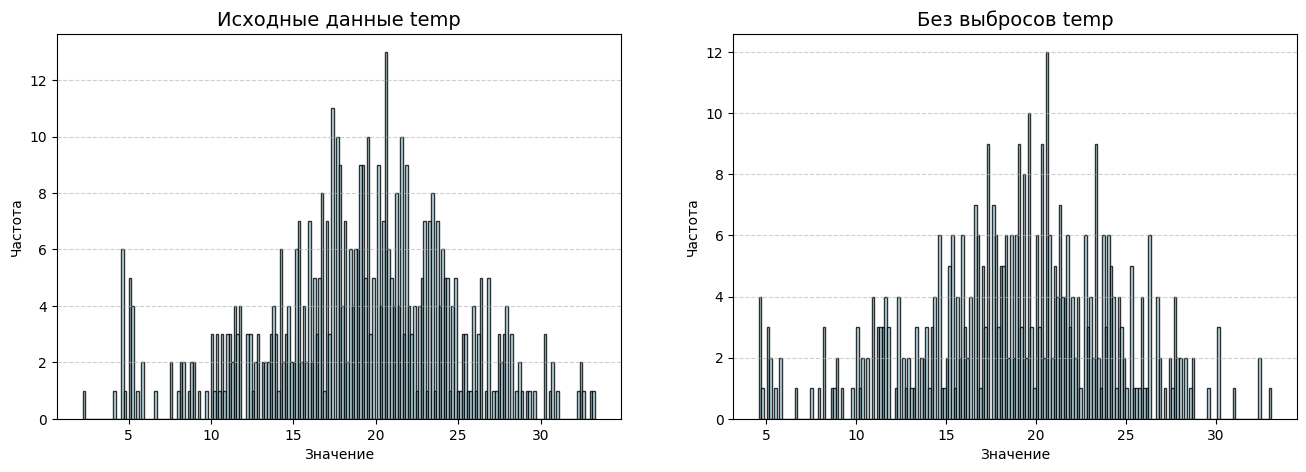

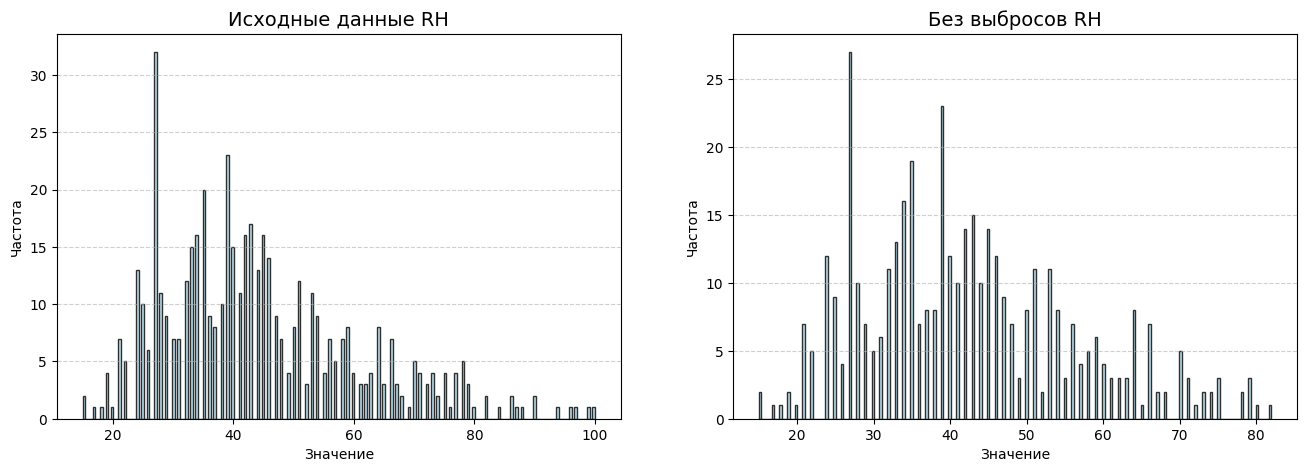

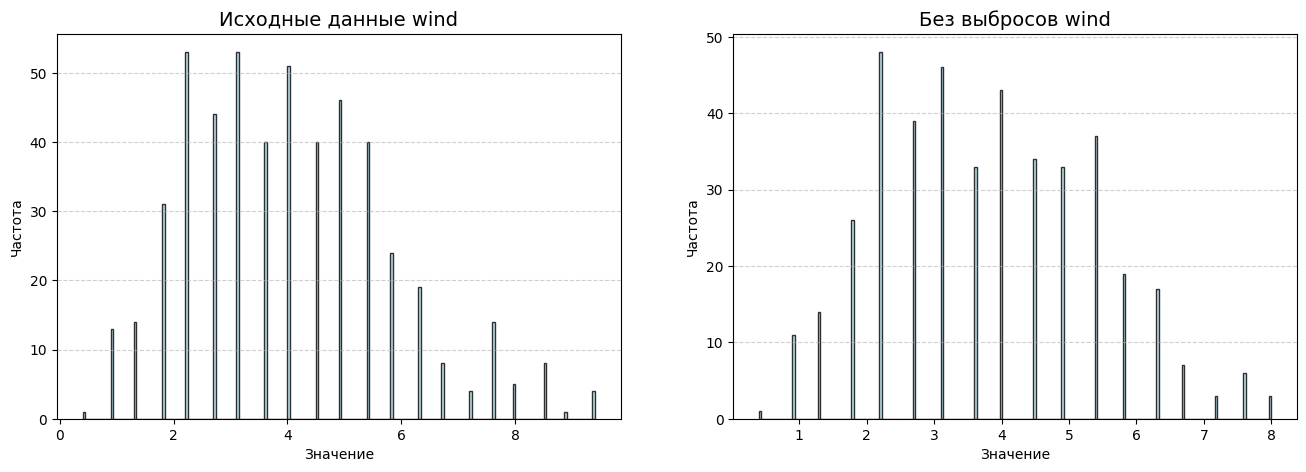

In [21]:
col_for_quan = ['DMC', 'ISI', 'temp', 'RH', 'wind']

for col in col_for_quan:

    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    axes[0].hist(
        data[col],
        bins=200,
        color='lightblue',
        edgecolor='black',
        alpha=0.8
    )
    axes[0].set_title(f'Исходные данные {col}', fontsize=14)
    axes[0].set_xlabel('Значение')
    axes[0].set_ylabel('Частота')
    axes[0].grid(axis='y', linestyle='--', alpha=0.6)

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_filtered = data_filtered[(data_filtered[col] >= lower_bound) & (data_filtered[col] <= upper_bound)]

    axes[1].hist(
        data_filtered[col],
        bins=200,
        color='lightblue',
        edgecolor='black',
        alpha=0.8
    )
    axes[1].set_title(f'Без выбросов {col}', fontsize=14)
    axes[1].set_xlabel('Значение')
    axes[1].set_ylabel('Частота')
    axes[1].grid(axis='y', linestyle='--', alpha=0.6)

    plt.show()

После обработки выбросов данные сохранили форму своих распределений, однако графики стали более читаемыми.

In [23]:
data_filtered.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.0,420.000000
mean,4.616667,4.266667,7.530952,3.216667,91.253095,106.091667,555.168333,8.840000,19.327143,42.526190,3.784524,0.0,6.157381
std,2.336431,1.251380,2.158735,2.072253,2.772507,54.317932,239.707465,3.485945,5.141624,13.781859,1.588885,0.0,13.990845
min,1.000000,2.000000,2.000000,0.000000,79.500000,3.000000,26.600000,1.100000,5.100000,15.000000,0.400000,0.0,0.000000
25%,3.000000,4.000000,7.000000,1.000000,90.500000,75.300000,474.900000,6.700000,16.200000,33.000000,2.700000,0.0,0.000000
50%,4.000000,4.000000,8.000000,3.000000,91.700000,104.200000,665.050000,8.400000,19.550000,41.000000,3.600000,0.0,0.225000
75%,7.000000,5.000000,9.000000,5.000000,92.900000,137.000000,714.300000,10.450000,22.900000,51.000000,4.900000,0.0,5.467500
max,9.000000,9.000000,12.000000,6.000000,95.900000,248.400000,822.800000,17.900000,33.100000,82.000000,8.000000,0.0,95.180000


Из метода `.describe()` по признаку `rain` можно сделать вывод, что дождя не было (max = 0), поэтому можем удалить этот столбец. 

In [24]:
data_filtered = data_filtered.drop('rain', axis=1)

### Выявление закономерностей

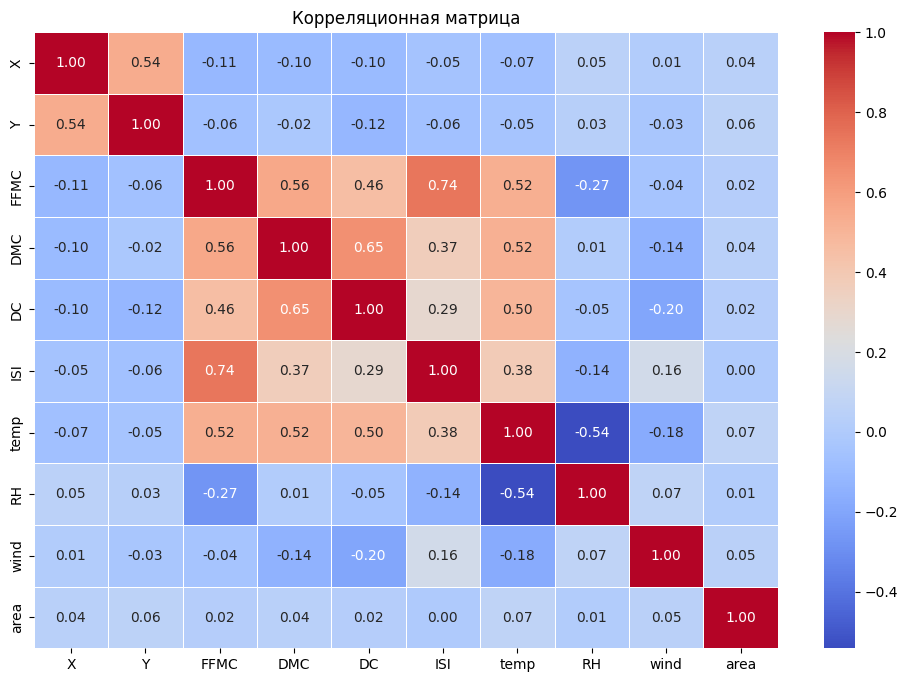

In [25]:
plt.figure(figsize=(12, 8))

col_for_heatmap = [col for col in data_filtered.columns if col not in ['month', 'day']]


sns.heatmap(data_filtered[col_for_heatmap].corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

В отчете Van Wagner (1987), Canadian Forest Service (https://ostrnrcan-dostrncan.canada.ca/entities/publication/d96e56aa-e836-4394-ba29-3afe91c3aa6c), в котором идет описание FWI системы, приведена формула для `BUI` (Buildup Index, "индекс накопления горючих материалов"), зависящая от `DMC` и `DC`. Упомянутые признаки обладают корреляцией 0.65, поэтому вместо них добавим столбец `BUI`, рассчитаный по формуле №36 на стр. 22.

Также в отчете формула №35 на стр. 21 указывает на то, что `ISI` зависит от `FFMC` и `wind`, что можно увидеть и на корреляционной матрице. `ISI` описывает, насколько быстро распространяется пожар с поправкой на ветер, а `FFMC` говорит только о скорости распространения огня, но без учета скорости ветра. Исходя из данных фактов, имеет смысл исключить признак `FFMC` из рассмотрения и оставить `ISI` как более обобщенный.

In [26]:
def calculate_BUI(DMC, DC):

    if DC == 0:
        return DMC
    
    if DMC <= 0.4 * DC:
        BUI = (0.8 * DMC * DC) / (DMC + 0.4 * DC)
    else:
        BUI = DMC - (1 - (0.8 * DC) / (DMC + 0.4 * DC)) * (0.92 + (0.0114 * DMC) ** 1.7)
    
    return max(0.0, BUI) 

data_filtered['BUI'] = data_filtered.apply(lambda row: calculate_BUI(row['DMC'], row['DC']), axis=1)

data_filtered = data_filtered.drop(['DMC', 'DC', 'FFMC'], axis=1)


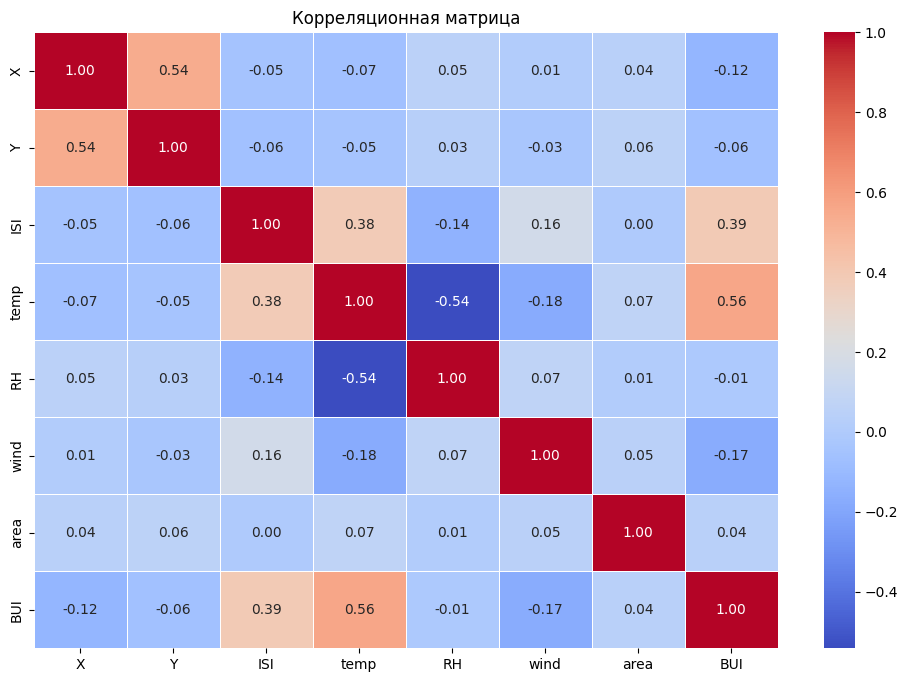

In [27]:
plt.figure(figsize=(12, 8))

col_for_heatmap = [col for col in data_filtered.columns if col not in ['month', 'day']]


sns.heatmap(data_filtered[col_for_heatmap].corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

In [28]:
from tabulate import tabulate

data_filtered['weekend'] = data_filtered['day'].isin([5, 6]).astype(int) 

summary_stats = data_filtered.groupby('weekend').agg(
    count=('area', 'count'),                
    avg_area=('area', lambda x: x.mean()),   
).round(3)

total_fires = data_filtered[data_filtered['area'] > 0].shape[0]  
fires_by_period = data_filtered[data_filtered['area'] > 0].groupby('weekend').size()

summary_stats['%_of_total_fires'] = (
    (fires_by_period / total_fires) * 100
).round(2)

summary_stats.index = summary_stats.index.map({0: 'Будни', 1: 'Выходные'})

summary_stats.columns = ['Число наблюдений', 'Средняя площадь пожара, га', '% от общего числа пожаров']

print(tabulate(summary_stats, headers='keys', tablefmt='grid', floatfmt=".2f"))

+-----------+--------------------+------------------------------+-----------------------------+
| weekend   |   Число наблюдений |   Средняя площадь пожара, га |   % от общего числа пожаров |
+===========+====================+==============================+=============================+
| Будни     |             281.00 |                         5.58 |                       67.45 |
+-----------+--------------------+------------------------------+-----------------------------+
| Выходные  |             139.00 |                         7.33 |                       32.55 |
+-----------+--------------------+------------------------------+-----------------------------+


На выходных по числу пожаров меньше, однако они крупнее по площади. В будни - пожары случаются чаще, но они имеют меньшую интенсивность. Такая зависимость может быть вызвана, например, увеличивающимся потоком туристов, которые жгут костры и жарят барбекю на природе. Parque Natural de Montesinho (Природный парк Монтесиньо) славится красивой природой, традиционными деревнями, культурой, историей, поэтому становится местом притяжения отдыхающих Португалии.

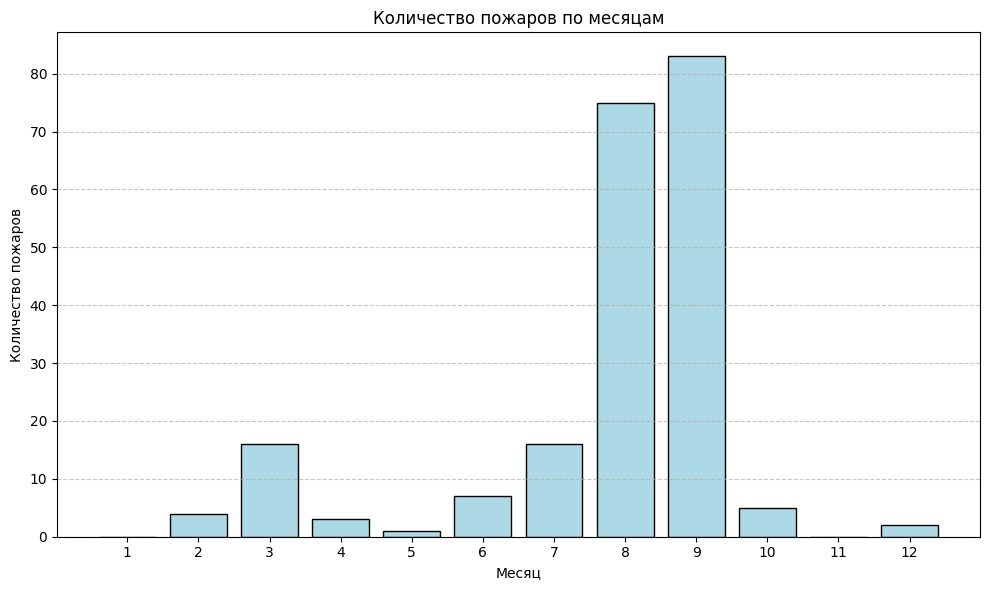

In [32]:
monthly_fires = data_filtered[data_filtered['area'] > 0].groupby('month').size().reindex(range(1, 13), fill_value=0)

plt.figure(figsize=(10, 6))
plt.bar(
    monthly_fires.index, 
    monthly_fires.values, 
    color='lightblue', 
    edgecolor='black')

plt.title('Количество пожаров по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество пожаров')

plt.xticks(range(1, 13))

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

По столбчатой диаграмме можно сделать вывод, что пожары случаются чаще всего в агусте и в сентябре.

### Заключение

- `X` и `Y` коррелируют со значением 0.54 - пожары в среднем распространяются в обоих направлениях,

- `ISI` (скорость распространения огня по поверхности) и `temp` коррелируют со значением 0.38 - чем жарче, тем быстрее пожар распространяется,

- `RH` и `temp` коррелируют со значением -0.54 - чем больше влажность, тем холоднее,

- `BUI` (индекс накопления горючих материалов) и `ISI` коррелируют со значением 0.39 - чем больше накопилось легковоспламеняемых материалов, тем быстрее пожар распространяется,

- `BUI` и `temp` коррелируют со значением 0.56 - чем жарче, тем быстрее пожар распространяется,

- Пожары на выходных поражают площади большие, чем в будние дни,

- Август и сентябрь - самые пожароопасные месяца в году.

Таким образом, проведённый анализ позволил выявить ключевые факторы, влияющие на возникновение и распространение лесных пожаров в парке Монтесиньо. Установлено, что погодные условия (`temp`, `RH`, `wind`), индексы системы FWI (`ISI`, `BUI`) и антропогенные факторы (выходные, сезонность) оказывают значительное влияние на частоту и масштаб пожаров. Полученные результаты могут быть использованы для улучшения прогнозирования пожароопасности и разработки мер по предотвращению и тушению лесных пожаров.

### Сохранение данных для последующей обработки

In [30]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 0 to 516
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   X        420 non-null    int8   
 1   Y        420 non-null    int8   
 2   month    420 non-null    int8   
 3   day      420 non-null    int8   
 4   ISI      420 non-null    float64
 5   temp     420 non-null    float64
 6   RH       420 non-null    int8   
 7   wind     420 non-null    float64
 8   area     420 non-null    float64
 9   BUI      420 non-null    float64
 10  weekend  420 non-null    int64  
dtypes: float64(5), int64(1), int8(5)
memory usage: 25.0 KB


In [31]:
data_filtered.to_csv('../data/forest_fires_filtered.csv', index=False)